In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Download KDD 10% data and place in same folder as notebook
filename = "kddcup.data_10_percent_corrected"

# KDD column names
column_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
    'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
]

# Load file
df = pd.read_csv(filename, names=column_names)

print("Shape:", df.shape)
df.head()


Shape: (494021, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
 print(df['label'].value_counts())


label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


In [5]:
# Convert label to binary (normal = 0, attack = 1)
df['target'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# Encode categorical variables
cat_cols = ['protocol_type', 'service', 'flag']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Drop original label column
df.drop('label', axis=1, inplace=True)

# Split X and y
X = df.drop('target', axis=1)
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Isolation Forest...
              precision    recall  f1-score   support

           0       0.18      0.80      0.29     97278
           1       0.61      0.08      0.14    396743

    accuracy                           0.22    494021
   macro avg       0.39      0.44      0.21    494021
weighted avg       0.52      0.22      0.17    494021



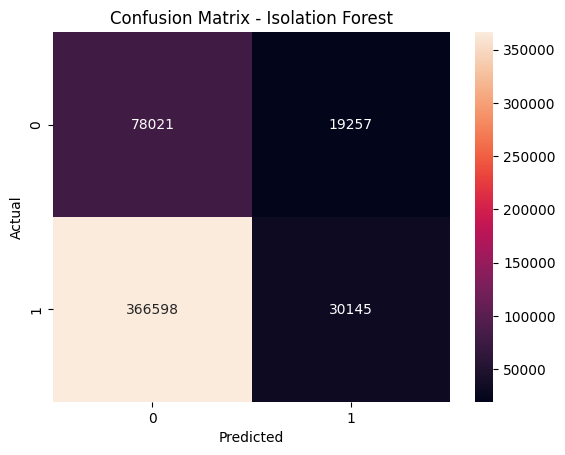

In [6]:
print("Isolation Forest...")

iso = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso.fit(X_scaled)

y_pred_iso = iso.predict(X_scaled)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)

print(classification_report(y, y_pred_iso))

cm_iso = confusion_matrix(y, y_pred_iso)
sns.heatmap(cm_iso, annot=True, fmt='d')
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Autoencoder...
Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 1.7167 - val_loss: 0.5484
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3673 - val_loss: 0.4089
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6356 - val_loss: 0.3340
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4440 - val_loss: 0.2847
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3404 - val_loss: 0.2272
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4556 - val_loss: 0.2374
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2379 - val_loss: 0.2249
Epoch 8/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3105 - val_loss: 0.1629
Epoch 9/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1633 - val_loss: 0.1624
Epoch 10/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2776 - val_loss: 0.1349
Epoch 11/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1948 - val_loss: 0.0910
Epoch 12/20
342/342 ━━━━━━━━━━━━━━━━

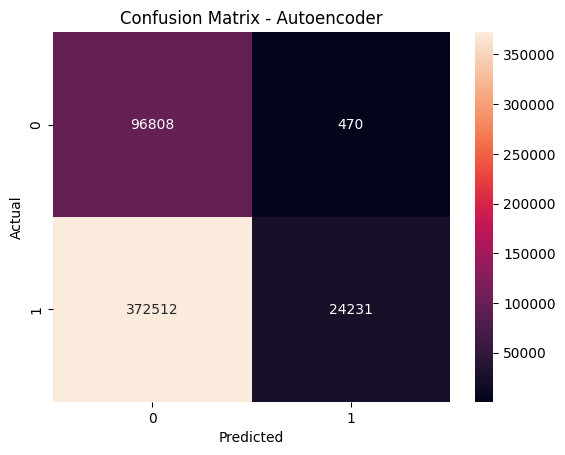

In [7]:
print("Autoencoder...")

# Only normal data for training
X_train = X_scaled[y == 0]

input_dim = X_scaled.shape[1]

# Build autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation="relu")(input_layer)
encoded = Dense(16, activation="relu")(encoded)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# Predict all data
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Threshold at 95th percentile
threshold = np.percentile(mse, 95)
print(f"Autoencoder Threshold: {threshold:.5f}")

y_pred_ae = (mse > threshold).astype(int)

print(classification_report(y, y_pred_ae))

cm_ae = confusion_matrix(y, y_pred_ae)
sns.heatmap(cm_ae, annot=True, fmt='d')
plt.title("Confusion Matrix - Autoencoder")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


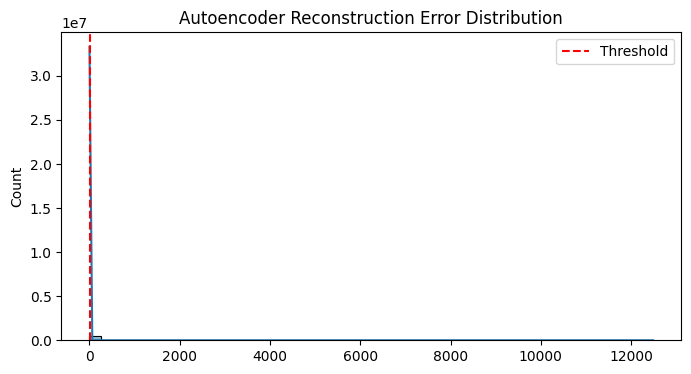

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Autoencoder Reconstruction Error Distribution")
plt.legend()
plt.show()
